In [2]:
from cryptory import Cryptory

In [3]:
my_cryptory = Cryptory(from_date="2013-04-28")

In [4]:
my_cryptory

<cryptory.cryptory.Cryptory instance at 0x7fa0287b5fc8>

In [5]:
# Daily data from coinmarketcap
bitcoin_market_info = my_cryptory.extract_coinmarketcap("bitcoin")
# bitcoin_market_info.columns = [bitcoin_market_info.columns[0]]+ \
#                 ['bt_'+i for i in bitcoin_market_info.columns[1:]]
# pd.DataFrame(data=data['date'], columns=['date'])
print(type(bitcoin_market_info))
bitcoin_market_info.loc[bitcoin_market_info['date'] == '2018-01-25' ]
# print(bitcoin_market_info[bitcoin_market_info['date'] > '2018-08-28']['date']] )

<class 'pandas.core.frame.DataFrame'>


,date,open,high,low,close,volume,marketcap
233,2018-01-25,11421.7,11785.7,11057.4,11259.4,8873169920,192162840576


In [6]:
# Daily subscriber numbers to the bitcoin reddit page
my_cryptory.extract_reddit_metrics(subreddit="bitcoin", metric="total-subscribers")

,date,total_subscribers
0,2018-03-04,759794
1,2018-03-03,758588
2,2018-03-02,757549
3,2018-03-01,756510
4,2018-02-28,755471
5,2018-02-27,754432
6,2018-02-26,753393
7,2018-02-25,752354
8,2018-02-24,751315
9,2018-02-23,750276


In [8]:
# Google Trends - bitcoin search results
# my_cryptory.get_google_trends(kw_list=["bitcoin"])

In [9]:
# dow jones price (market code from yahoo finance)
# my_cryptory.get_stock_prices(market="%5EDJI")

In [10]:
# USD/EUR exchange rate
# my_cryptory.get_exchange_rates(from_currency="USD", to_currency="EUR")

In [11]:
# USD/EUR exchange rate
# my_cryptory.get_exchange_rates(from_currency="USD", to_currency="EUR")

In [12]:
# get historical commodity prices
# my_cryptory.get_metal_prices()

In [2]:
import seaborn as sns
from cryptory import Cryptory
import datetime
import matplotlib.pyplot as plt
import urllib2 as urllib
import time
import numpy as np
import pandas as pd
from datetime import timedelta
import numpy as np

"""
    Func to make data from blockchain or other sources consistent with btc exchange data
    If data from APIs has data since 2009 we omit those, if no data exist of a date, the previous date value is used
"""
def drop_inititial_rows(api, start_date='2013-04-28'):
    # Read data 
    api_range_format= api+'?timespan=all&format=csv'
#     print(api_range_format)
    data = pd.read_csv(urllib.urlopen(api_range_format))
    
    # Check if its the Block Size data
    if 'avg' in api:
        # Format columns
        data = pd.DataFrame(data.values, columns=['date', 'avg_block_size'])
        data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
        data['date'] = pd.DataFrame(data=data['date'], columns=['date'])

        data['date'] = pd.to_datetime(data['date'])

        # Add dates that do not appear at all, because their blocksize was same as the day before
        data = data.set_index('date').resample('D').ffill()

        # Reset index
        data.index.name='date'
        data = data.reset_index()
        data = data

        # Drop values before 2013, to be consistent with BTC Exchange dataset
        data = data.drop(data[data['date'] < '2013-04-28'].index)
        data = data.reset_index(drop=True)
        return data
        
    elif 'transactions' in api:
        # Get the average block size from blockchain.info; max size ==> 1 MB (by design)
        df = data
        df = pd.DataFrame(df.values, columns=['date', 'avg_block_size'])
        df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
        df['date'] = pd.DataFrame(data=df['date'], columns=['date'])
        df['date']=df
        df['date'] = pd.to_datetime(df['date'])
        # Remove rows corresponding to dates before 2013-05-02
        df = df.set_index('date').resample('D').ffill()
        df.index.name='date'
        df.index.names = ['date']
        data = df.reset_index()
        df = data
        df[df['date'] < start_date]

        df = df.drop(df[df['date'] < start_date].index)
        df = df.reset_index(drop=True)
        return df

In [3]:
def rename_columns(prepend_to_name, df):
    df.columns = [df.columns[0]]+ \
                [str(prepend_to_name)+i for i in df.columns[1:]]

In [4]:
####################################################################################################################
######## Getting Blockchain data
####################################################################################################################

# Get the average block size from blockchain.info; max size ==> 1 MB (by design)
block_size_api = "https://blockchain.info/charts/avg-block-size" 
avg_block_size = drop_inititial_rows(block_size_api)

# Get transactions Daily
txs_api = "https://api.blockchain.info/charts/n-transactions" 
txs = drop_inititial_rows(txs_api)


####################################################################################################################
######## Getting Exchange Data, Sentiment Data (Reddit & Google Trends), Fin. Indecies (Yahoo), USD & EUR Exchanges
####################################################################################################################
my_cryptory = Cryptory(from_date="2013-04-28")

btc_market_info = my_cryptory.extract_coinmarketcap('bitcoin')[['date','close','volume']]
rename_columns('bt_', btc_market_info)

# Get volume, and rest of data

btc_google_trends = my_cryptory.get_google_trends(kw_list=['bitcoin'])
rename_columns('google_trends_', btc_google_trends)

btc_reddit_subscribers = my_cryptory.extract_reddit_metrics(subreddit="bitcoin", 
                                         metric="total-subscribers")
rename_columns('reddit_', btc_reddit_subscribers)

# Dow Jones price (market code)
dow_jones_stock = my_cryptory.get_stock_prices(market="%5EDJI")

# Exchange rates
eur_usd_exchange_rate = my_cryptory.get_exchange_rates(from_currency="USD", to_currency="EUR")

btc_final = btc_market_info.merge(btc_google_trends, on='date', how='inner').merge(btc_reddit_subscribers,on='date', how='inner'). \
            merge(dow_jones_stock,on='date' ,how='inner'). \
            merge(eur_usd_exchange_rate, on='date', how='inner'). \
            merge(avg_block_size, on='date', how='inner')


btc_final.to_csv('btc_data_reconciliation.csv')

# Need to scale columns (min-max scaling)
btc_final[['google_trends_bitcoin','bt_close', 'bt_volume', 'reddit_total_subscribers', 'adjclose', 'exch_rate', 'avg_block_size']] = (
        btc_final[['google_trends_bitcoin', 'bt_close', 'bt_volume', 'reddit_total_subscribers', 'adjclose', 'exch_rate', 'avg_block_size']]- \
        btc_final[['google_trends_bitcoin', 'bt_close', 'bt_volume', 'reddit_total_subscribers', 'adjclose', 'exch_rate', 'avg_block_size']].min())/(
        btc_final[['google_trends_bitcoin', 'bt_close', 'bt_volume', 'reddit_total_subscribers', 'adjclose', 'exch_rate', 'avg_block_size']].max()- \
        btc_final[['google_trends_bitcoin', 'bt_close', 'bt_volume', 'reddit_total_subscribers', 'adjclose', 'exch_rate', 'avg_block_size']].min())

# Alternatively, we could have scaled with scikit
# from sklearn.preprocessing import minmax_scale
# btc_final[['bitcoin','close', 'total_subscribers']] = minmax_scale(btc_final[['bitcoin','close', 'total_subscribers']])

In [5]:
# Get rid of rows where volume is 0
btc_final = btc_final[btc_final['bt_volume']!=0]

In [6]:
split_date = '2018-01-03'

# we don't need the date columns anymore
training_set, test_set = btc_final[btc_final['date']<split_date], btc_final[btc_final['date']>=split_date]
# print(training_set)
training_set = training_set.drop('date', 1)
test_set = test_set.drop('date', 1)

In [7]:
window_len = 20
norm_cols = ['bt_close','bt_volume']
print(norm_cols)

['bt_close', 'bt_volume']


In [8]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['bt_close'][window_len:].values/training_set['bt_close'][:-window_len].values)-1

In [12]:
print(LSTM_training_inputs[len(LSTM_training_inputs)-1])
print(LSTM_training_inputs[0])

      bt_close  bt_volume  google_trends_bitcoin  reddit_total_subscribers  \
1513  0.000000   0.000000               0.036290                  0.077279   
1514  0.032938   0.467793               0.031990                  0.076829   
1515 -0.003076   0.087758               0.029840                  0.076402   
1516  0.007260   1.380291               0.028765                  0.075970   
1517  0.035962   1.069188               0.028765                  0.075641   
1518  0.102086   1.337119               0.028765                  0.075201   
1519  0.042818   0.664646               0.034140                  0.074763   
1520  0.014638   2.133201               0.034140                  0.074322   
1521  0.009241   2.873541               0.035215                  0.073819   
1522 -0.043835   3.246197               0.037365                  0.073409   
1523  0.153363   3.468346               0.038440                  0.072941   
1524  0.127607   2.806849               0.030915                

In [13]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['bt_close'][window_len:].values/test_set['bt_close'][:-window_len].values)-1
print(LSTM_test_outputs)

[-0.22596921 -0.29416431 -0.22368004 -0.20344643 -0.20642976 -0.29128746
 -0.25370281 -0.28234424 -0.15763127 -0.11005827 -0.11817458 -0.14308645
 -0.10432923 -0.10029695  0.07102678  0.0609909   0.11871561  0.09952495
  0.18721966  0.32369623  0.21921419  0.34750556  0.34818617  0.48015181
  0.407679    0.51021665  0.44688943  0.6585357   0.67524346  0.50481525
  0.63104863  0.52845549  0.31368103  0.48486382  0.32747683  0.23972787
  0.32793805  0.47790816  0.56005869  0.5376066   0.43803825  0.39304168]


In [14]:
# I find it easier to work with numpy arrays rather than pandas dataframes
# especially as we now only have numerical data
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [ ]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
    
    print(inputs.shape[1])
    print(inputs.shape[2])
    
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

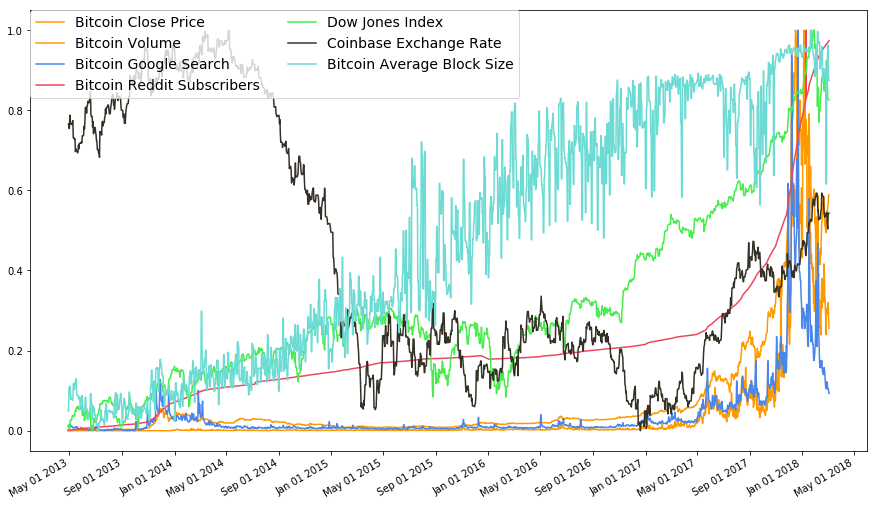

In [16]:
%matplotlib inline
fig, ax1 = plt.subplots(1, 1, figsize=(15, 9)) # 1 row 1 col

fig.autofmt_xdate()

ax1.set_xticks([datetime.date(j,i,1) for i in range(1,13,4) for j in range(2013,2019)])
ax1.set_xticklabels([datetime.date(j,i,1).strftime('%b %d %Y') 
                     for i in range(1,13,4) for j in range(2013,2019)])

ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['bt_close'], label='Bitcoin Close Price', color='#FF9900')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['bt_volume'], label='Bitcoin Volume', color='#FF9900')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['google_trends_bitcoin'], label="Bitcoin Google Search", color='#4885ed')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['reddit_total_subscribers'], label="Bitcoin Reddit Subscribers", color='#ed475e')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['adjclose'], label="Dow Jones Index", color='#47ed4c')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['exch_rate'], label="Coinbase Exchange Rate", color='#353127')
ax1.plot(btc_final['date'].astype(datetime.datetime),
             btc_final['avg_block_size'], label="Bitcoin Average Block Size", color='#6bdbd3')

ax1.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0., ncol=2, prop={'size': 14})
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np

def build_model(inputs, output_size, neurons, activ_func = "linear",
                dropout =0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))

    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


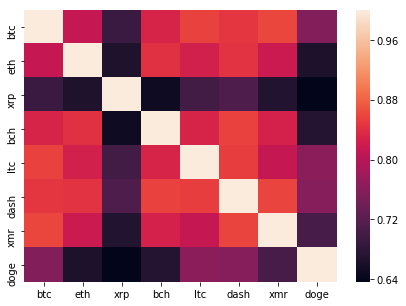

In [21]:
# Pearson correlation on all data sources
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_cryptory = Cryptory(from_date="2018-01-01")
all_coins_df = my_cryptory.extract_bitinfocharts("btc")
# coins of interest
bitinfocoins = ["btc", "eth", "xrp", "bch", "ltc", "dash", "xmr", "doge"]
for coin in bitinfocoins[1:]:
    all_coins_df = all_coins_df.merge(my_cryptory.extract_bitinfocharts(coin), on="date", how="left")
# date column not need for upcoming calculations
all_coins_df = all_coins_df.drop('date', axis=1)
# Percentage change => 
# first calculate: Increase = y_t - y_(t-1) then calculate: %Increace = (Increase-y_(t-1))*100
"""
    %Increase is used both to track the prices of individual securities and 
    of large market indexes, as well as comparing the values of different currencies.  
    Balance sheets with comparative financial statements will generally include the 
    prices of specific assets at different points in time along with the percentage 
    changes over the accompanying periods of time.  
"""
# Compute pairwise correlation of columns, excluding NA/null values
corr = all_coins_df.pct_change().corr(method='pearson')
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(corr, 
            xticklabels=[col.replace("_price", "") for col in corr.columns.values],
            yticklabels=[col.replace("_price", "") for col in corr.columns.values],
            annot_kws={"size": 16})
plt.show()

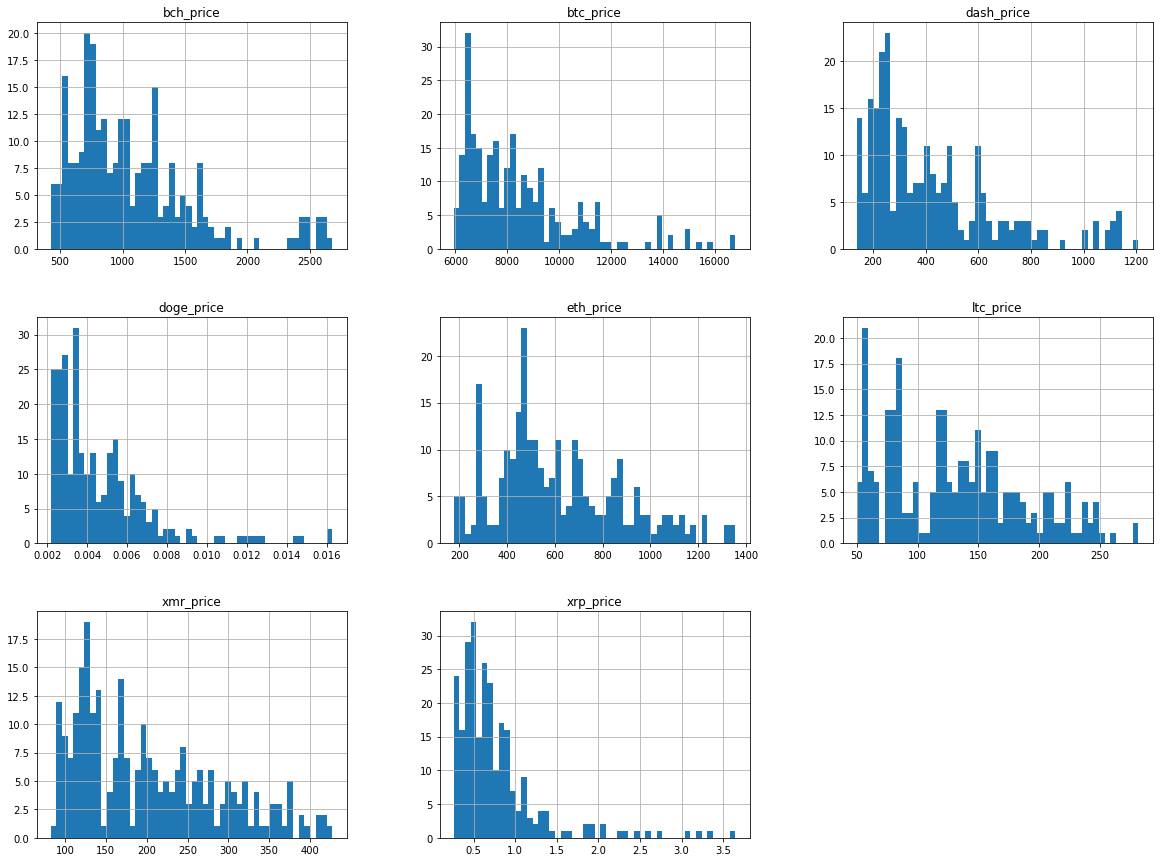

In [22]:
import matplotlib.pyplot as plt
all_coins_df.hist(bins=50, figsize=(20,15))
# print(all_coins_df)
plt.show()